In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
# type d => <enter> => stopwords => <enter>
# type d => <enter> => wordnet => <enter> => q

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv('gdrive/MyDrive/researchProjectIME/new_df_marked.csv')[:401]
df.drop_duplicates(subset=['tweet'])
print('Out of {} tweets, {} are demanding vaccines and {} are not.'.format(len(df), len(df[df['Imad'] == 1]), len(df[df['Imad'] == 0])))

Out of 401 tweets, 146 are demanding vaccines and 255 are not.


In [40]:
import re
import string

def clean(txt: str):
  txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
  txt = re.sub(r'&amp', 'and', txt)
  txt = re.sub('#', '', txt)
  txt = re.sub(r'RT', '', txt)
  txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
  txt = ''.join([c for c in txt if c not in string.punctuation])
  txt = txt.lower()
  #for c in string.punctuation:
  #  txt = re.sub(c, '', txt)
  return txt

def tokenize(text: str):
  tokens = re.split('\W+', text)
  return tokens

In [41]:
stopwords = nltk.corpus.stopwords.words('english')

def removeStopwords(tokens):
  ret = [token for token in tokens if token not in stopwords]
  ret = [token for token in tokens if token != '']
  return ret

In [42]:
wn = nltk.WordNetLemmatizer()

def lemmatize(tokens):
  ret = [wn.lemmatize(token) for token in tokens]
  return ret

def finalClean(txt: str):
  return lemmatize(removeStopwords(tokenize(clean(txt))))

dDict = open('gdrive/MyDrive/researchProjectIME/data_dictionary_prob.csv', 'r').read().split('\n')
df['Count'] = 0
def dictPercent(words):
  s = []
  for word in words:
    if word in dDict:
      s += [word]
  listToStr = ' '.join([str(elem) for elem in s])
  return listToStr
df['final'] = df['tweet'].apply(finalClean)
df['Dict'] = df['final'].apply(dictPercent)

In [43]:
df.head()

,Unnamed: 0,date,tweet,language,hashtags,nlikes,nreplies,nlikes.1,nretweets,Achint,Imad,Unnamed: 11,Count,final,Dict
0,0,22/03/2021 9:55,@ANI @LtGovDelhi @ArvindKejriwal Those stil un...,en,[],0,0,0,0,0.0,0.0,NaN,0,"[those, stil, unable, to, go, to, vaccination,...",call do
1,1,23/03/2021 23:14,#Mumbai: Actor Sanjay Dutt received his first ...,en,['mumbai'],1,0,1,1,0.0,0.0,NaN,0,"[mumbai, actor, sanjay, dutt, received, his, f...",
2,2,03/03/2021 15:28,It will be difficult for differently abled per...,en,[],2,1,2,1,0.0,1.0,NaN,0,"[it, will, be, difficult, for, differently, ab...",
3,3,31/03/2021 0:31,@priyankac19 But don’t you feel on door to doo...,en,[],0,1,0,0,1.0,1.0,NaN,0,"[but, don, t, you, feel, on, door, to, door, v...",feel need reduce can should
4,4,16/01/2021 9:59,"Dense fog at Max Hospital Saket, a COVID vacci...",en,[],8,0,8,0,0.0,0.0,NaN,0,"[dense, fog, at, max, hospital, saket, a, covi...",


In [44]:
df.to_csv('new_df_marked_cleaned.csv')

scikit-learn                  0.22.2.post1       


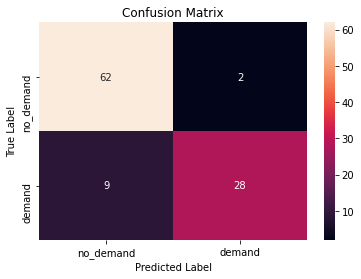

In [45]:
!pip list | grep scikit-learn || pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X = df[['tweet']]
y = df['Achint']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

countVect = CountVectorizer(analyzer=finalClean)
count_fit_train = countVect.fit_transform(X_train['tweet'])
count_fit_test = countVect.transform(X_test['tweet'])

X_train_vec = pd.DataFrame(count_fit_train.toarray())
X_test_vec = pd.DataFrame(count_fit_test.toarray())

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vec, y_train)
y_pred = rf_model.predict(X_test_vec)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')

cm = confusion_matrix(y_test, y_pred)
class_label = ["no_demand", "demand"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [46]:
print(precision, recall, fscore, acs(y_test, y_pred))

0.9333333333333333 0.7567567567567568 0.835820895522388 0.8910891089108911


In [47]:
df_pred.head()

,Unnamed: 0,Unnamed: 0.1,date,tweet,language,hashtags,user_id,retweet,nlikes,nreplies,nretweets,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,time,PredictDict,final,Dict,PredictDicted,total,predicted,sum
0,0,184,2021-02-25,Allowing private hospitals to vaccinate will b...,en,[],824588996462338048,False,4,0,0,"['allowing', 'private', 'hospitals', 'to', 'va...","['allowing', 'private', 'hospitals', 'vaccinat...","['allow', 'privat', 'hospit', 'vaccin', 'boost...","['allowing', 'private', 'hospital', 'vaccinate...",02:24:40,8,"[allowing, private, hospital, to, vaccinate, w...",allowing,1,0,0.0,8
1,1,238,2021-02-25,Of the mm vaccination shots that have been adm...,en,[],502080208,False,0,0,0,"['of', 'the', 'mm', 'vaccination', 'shots', 't...","['mm', 'vaccination', 'shots', 'administered',...","['mm', 'vaccin', 'shot', 'administ', 'worldwid...","['mm', 'vaccination', 'shot', 'administered', ...",02:53:37,7,"[of, the, mm, vaccination, shot, that, have, b...",have do,1,0,0.0,7
2,2,237,2021-02-25,In a boost for COVID battle Pfizer vaccine fou...,en,['covid19vaccine'],3187924020,False,0,0,0,"['in', 'a', 'boost', 'for', 'covid', 'battle',...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...","['boost', 'covid', 'battl', 'pfizer', 'vaccin'...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...",03:02:07,12,"[in, a, boost, for, covid, battle, pfizer, vac...",found should,1,0,0.0,19
3,3,33,2021-02-25,In a boost for COVID battle Pfizer vaccine fou...,en,['covid19vaccine'],3187924020,False,0,0,0,"['in', 'a', 'boost', 'for', 'covid', 'battle',...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...","['boost', 'covid', 'battl', 'pfizer', 'vaccin'...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...",03:02:07,12,"[in, a, boost, for, covid, battle, pfizer, vac...",found should,1,0,0.0,31
4,4,27,2021-02-25,ANI गर्मी बढ़ गई है पृथ्वी पर GlobalWarming...,en,"['globalwarming', 'primeminister']",88895954,False,3,0,1,"['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...",03:15:07,8,"[ani, गर, म, बढ, गई, ह, प, थ, व, पर, globalwar...",come can,1,0,0.0,39


In [100]:
df_pred = pd.read_csv('gdrive/MyDrive/researchProjectIME/event_modi.csv')

In [49]:
df_pred['PredictDict'] = 0

In [50]:
for word in df_pred['Tweet_lemmatized']:
  if word in dDict:
    print(word)

In [51]:
df_pred['final'] = df_pred['tweet'].apply(finalClean)
df_pred['Dict'] = df_pred['final'].apply(dictPercent)

In [52]:
cnt = []
for i in range(574):
  cnt.append(len(df_pred['Dict'][i]))

In [53]:
df_pred['PredictDict'] = cnt

In [54]:
df_pred['PredictDict'].value_counts()

0     244
4      77
3      46
6      32
7      27
14     13
11     12
12     12
13     12
8      11
5      10
9       9
10      9
15      8
22      7
26      7
17      6
18      6
28      5
16      3
21      3
23      3
19      2
20      2
24      2
27      2
2       2
32      1
38      1
Name: PredictDict, dtype: int64

In [55]:
df_pred['PredictDict'].value_counts()

0     244
4      77
3      46
6      32
7      27
14     13
11     12
12     12
13     12
8      11
5      10
9       9
10      9
15      8
22      7
26      7
17      6
18      6
28      5
16      3
21      3
23      3
19      2
20      2
24      2
27      2
2       2
32      1
38      1
Name: PredictDict, dtype: int64

In [56]:
df_pred['PredictDicted'] = 0

In [57]:
for i in range(574):
  if df_pred['PredictDict'][i] > 5:
    df_pred['PredictDicted'][i] = 1
  else:
    df_pred['PredictDicted'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [58]:
df_pred.head()

,Unnamed: 0,Unnamed: 0.1,date,tweet,language,hashtags,user_id,retweet,nlikes,nreplies,nretweets,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,time,PredictDict,final,Dict,PredictDicted
0,0,184,2021-02-25,Allowing private hospitals to vaccinate will b...,en,[],824588996462338048,False,4,0,0,"['allowing', 'private', 'hospitals', 'to', 'va...","['allowing', 'private', 'hospitals', 'vaccinat...","['allow', 'privat', 'hospit', 'vaccin', 'boost...","['allowing', 'private', 'hospital', 'vaccinate...",02:24:40,8,"[allowing, private, hospital, to, vaccinate, w...",allowing,1
1,1,238,2021-02-25,Of the mm vaccination shots that have been adm...,en,[],502080208,False,0,0,0,"['of', 'the', 'mm', 'vaccination', 'shots', 't...","['mm', 'vaccination', 'shots', 'administered',...","['mm', 'vaccin', 'shot', 'administ', 'worldwid...","['mm', 'vaccination', 'shot', 'administered', ...",02:53:37,7,"[of, the, mm, vaccination, shot, that, have, b...",have do,1
2,2,237,2021-02-25,In a boost for COVID battle Pfizer vaccine fou...,en,['covid19vaccine'],3187924020,False,0,0,0,"['in', 'a', 'boost', 'for', 'covid', 'battle',...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...","['boost', 'covid', 'battl', 'pfizer', 'vaccin'...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...",03:02:07,12,"[in, a, boost, for, covid, battle, pfizer, vac...",found should,1
3,3,33,2021-02-25,In a boost for COVID battle Pfizer vaccine fou...,en,['covid19vaccine'],3187924020,False,0,0,0,"['in', 'a', 'boost', 'for', 'covid', 'battle',...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...","['boost', 'covid', 'battl', 'pfizer', 'vaccin'...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...",03:02:07,12,"[in, a, boost, for, covid, battle, pfizer, vac...",found should,1
4,4,27,2021-02-25,ANI गर्मी बढ़ गई है पृथ्वी पर GlobalWarming...,en,"['globalwarming', 'primeminister']",88895954,False,3,0,1,"['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...",03:15:07,8,"[ani, गर, म, बढ, गई, ह, प, थ, व, पर, globalwar...",come can,1


In [59]:
X_to_pred = pd.DataFrame(countVect.transform(df_pred['tweet']).toarray())
y_to_pred = rf_model.predict(X_to_pred)
df_pred['predicted'] = y_to_pred

In [60]:

df_pred.to_csv('predict_1.csv')

In [61]:
df_pred['sum'] = 0

In [62]:
sum = 0
df_pred['sum'][0] = df_pred['PredictDict'][0]
for i in range(1,574):
  if df_pred['date'][i] == df_pred['date'][i-1]:
    sum += df_pred['PredictDict'][i]
    df_pred['sum'][i] = sum
  else:
    sum = 0
    df_pred['sum'][i] = df_pred['PredictDict'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [63]:
df_pred['total'] = 0
for i in range(574):
  if df_pred['PredictDict'][i] == 1 or df_pred['predicted'][i] == 1:
    df_pred['total'][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [64]:
df_pred['sum'][44]

0

In [65]:
df_pred.to_csv('predicted.csv')

In [66]:
df_pred.describe()

,Unnamed: 0,Unnamed: 0.1,user_id,nlikes,nreplies,nretweets,PredictDict,PredictDicted,predicted,sum,total
count,574.000000,574.000000,5.740000e+02,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,286.500000,75.851916,4.405972e+17,13.306620,0.484321,3.003484,5.209059,0.339721,0.078397,249.689895,0.078397
std,165.843802,66.638516,5.546146e+17,110.180813,2.468425,14.274301,6.824772,0.474028,0.269030,217.376700,0.269030
min,0.000000,0.000000,5.804482e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143.250000,19.000000,2.855255e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.250000,0.000000
50%,286.500000,53.000000,2.535595e+09,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,182.500000,0.000000
75%,429.750000,127.000000,1.017738e+18,3.000000,0.000000,1.000000,7.000000,1.000000,0.000000,333.750000,0.000000
max,573.000000,238.000000,1.367497e+18,2344.000000,54.000000,246.000000,38.000000,1.000000,1.000000,924.000000,1.000000


In [67]:
import pandas as pd 
import numpy as np 

In [68]:
df = pd.read_csv('predicted.csv')

In [69]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,tweet,language,hashtags,user_id,retweet,nlikes,nreplies,nretweets,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,time,PredictDict,final,Dict,PredictDicted,predicted,sum,total
0,0,0,184,2021-02-25,Allowing private hospitals to vaccinate will b...,en,[],824588996462338048,False,4,0,0,"['allowing', 'private', 'hospitals', 'to', 'va...","['allowing', 'private', 'hospitals', 'vaccinat...","['allow', 'privat', 'hospit', 'vaccin', 'boost...","['allowing', 'private', 'hospital', 'vaccinate...",02:24:40,8,"['allowing', 'private', 'hospital', 'to', 'vac...",allowing,1,0.0,8,0
1,1,1,238,2021-02-25,Of the mm vaccination shots that have been adm...,en,[],502080208,False,0,0,0,"['of', 'the', 'mm', 'vaccination', 'shots', 't...","['mm', 'vaccination', 'shots', 'administered',...","['mm', 'vaccin', 'shot', 'administ', 'worldwid...","['mm', 'vaccination', 'shot', 'administered', ...",02:53:37,7,"['of', 'the', 'mm', 'vaccination', 'shot', 'th...",have do,1,1.0,7,1
2,2,2,237,2021-02-25,In a boost for COVID battle Pfizer vaccine fou...,en,['covid19vaccine'],3187924020,False,0,0,0,"['in', 'a', 'boost', 'for', 'covid', 'battle',...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...","['boost', 'covid', 'battl', 'pfizer', 'vaccin'...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...",03:02:07,12,"['in', 'a', 'boost', 'for', 'covid', 'battle',...",found should,1,0.0,19,0
3,3,3,33,2021-02-25,In a boost for COVID battle Pfizer vaccine fou...,en,['covid19vaccine'],3187924020,False,0,0,0,"['in', 'a', 'boost', 'for', 'covid', 'battle',...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...","['boost', 'covid', 'battl', 'pfizer', 'vaccin'...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...",03:02:07,12,"['in', 'a', 'boost', 'for', 'covid', 'battle',...",found should,1,0.0,31,0
4,4,4,27,2021-02-25,ANI गर्मी बढ़ गई है पृथ्वी पर GlobalWarming...,en,"['globalwarming', 'primeminister']",88895954,False,3,0,1,"['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...",03:15:07,8,"['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...",come can,1,0.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,569,569,0,2021-03-04,Sebs testing helmet reminds me of this,en,[],102964560,False,1,0,0,"['sebs', 'testing', 'helmet', 'reminds', 'me',...","['sebs', 'testing', 'helmet', 'reminds']","['seb', 'test', 'helmet', 'remind']","['seb', 'testing', 'helmet', 'reminds']",19:36:28,0,"['seb', 'testing', 'helmet', 'reminds', 'me', ...",NaN,0,0.0,259,0
570,570,570,1,2021-03-04,Countries that have administered the most COVI...,en,['covid19'],1353438953903370241,False,2,0,0,"['countries', 'that', 'have', 'administered', ...","['countries', 'administered', 'covid', 'vaccin...","['countri', 'administ', 'covid', 'vaccin', 'do...","['country', 'administered', 'covid', 'vaccine'...",19:49:21,4,"['country', 'that', 'have', 'administered', 't...",have,0,0.0,263,0
571,571,571,0,2021-03-04,Big jump in vaccination drive nearly lakh dos...,en,['covidvaccine'],1353438953903370241,False,1,0,0,"['big', 'jump', 'in', 'vaccination', 'drive', ...","['big', 'jump', 'vaccination', 'drive', 'nearl...","['big', 'jump', 'vaccin', 'drive', 'nearli', '...","['big', 'jump', 'vaccination', 'drive', 'nearl...",20:32:14,0,"['big', 'jump', 'in', 'vaccination', 'drive', ...",NaN,0,0.0,263,0
572,572,572,0,2021-03-04,Big jump in vaccination drive nearly lakh dos...,en,['covidvaccine'],1353438953903370241,False,1,0,0,"['big', 'jump', 'in', 'vaccination', 'drive', ...","['big', 'jump', 'vaccination', 'drive', 'nearl...","['big', 'jump', 'vaccin', 'drive', 'nearli', '...","['big', 'jump', 'vaccination', 'drive', 'nearl...",20:32:14,0,"['big', 'jump', 'in', 'vaccination', 'drive', ...",NaN,0,0.0,263,0


In [70]:
for i in range(574):
  df['total'][i] = df['predicted'][i] or df['PredictDicted'][i] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
df.head(100)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,tweet,language,hashtags,user_id,retweet,nlikes,nreplies,nretweets,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,time,PredictDict,final,Dict,PredictDicted,predicted,sum,total
0,0,0,184,2021-02-25,Allowing private hospitals to vaccinate will b...,en,[],824588996462338048,False,4,0,0,"['allowing', 'private', 'hospitals', 'to', 'va...","['allowing', 'private', 'hospitals', 'vaccinat...","['allow', 'privat', 'hospit', 'vaccin', 'boost...","['allowing', 'private', 'hospital', 'vaccinate...",02:24:40,8,"['allowing', 'private', 'hospital', 'to', 'vac...",allowing,1,0.0,8,1
1,1,1,238,2021-02-25,Of the mm vaccination shots that have been adm...,en,[],502080208,False,0,0,0,"['of', 'the', 'mm', 'vaccination', 'shots', 't...","['mm', 'vaccination', 'shots', 'administered',...","['mm', 'vaccin', 'shot', 'administ', 'worldwid...","['mm', 'vaccination', 'shot', 'administered', ...",02:53:37,7,"['of', 'the', 'mm', 'vaccination', 'shot', 'th...",have do,1,1.0,7,1
2,2,2,237,2021-02-25,In a boost for COVID battle Pfizer vaccine fou...,en,['covid19vaccine'],3187924020,False,0,0,0,"['in', 'a', 'boost', 'for', 'covid', 'battle',...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...","['boost', 'covid', 'battl', 'pfizer', 'vaccin'...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...",03:02:07,12,"['in', 'a', 'boost', 'for', 'covid', 'battle',...",found should,1,0.0,19,1
3,3,3,33,2021-02-25,In a boost for COVID battle Pfizer vaccine fou...,en,['covid19vaccine'],3187924020,False,0,0,0,"['in', 'a', 'boost', 'for', 'covid', 'battle',...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...","['boost', 'covid', 'battl', 'pfizer', 'vaccin'...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...",03:02:07,12,"['in', 'a', 'boost', 'for', 'covid', 'battle',...",found should,1,0.0,31,1
4,4,4,27,2021-02-25,ANI गर्मी बढ़ गई है पृथ्वी पर GlobalWarming...,en,"['globalwarming', 'primeminister']",88895954,False,3,0,1,"['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...",03:15:07,8,"['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...",come can,1,0.0,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,149,2021-02-27,Patient Baby Anshika Hospital AIIMS New D...,en,[],31753018,False,0,0,3,"['patient', 'baby', 'anshika', 'hospital', 'ai...","['patient', 'baby', 'anshika', 'hospital', 'ai...","['patient', 'babi', 'anshika', 'hospit', 'aiim...","['patient', 'baby', 'anshika', 'hospital', 'ai...",13:19:46,6,"['patient', 'baby', 'anshika', 'hospital', 'ai...",please,1,0.0,89,1
96,96,96,58,2021-02-27,Centre fixes COVID vaccine price at Rs per dose,en,[],122317608,False,2,0,0,"['centre', 'fixes', 'covid', 'vaccine', 'price...","['centre', 'fixes', 'covid', 'vaccine', 'price...","['centr', 'fix', 'covid', 'vaccin', 'price', '...","['centre', 'fix', 'covid', 'vaccine', 'price',...",14:05:32,0,"['centre', 'fix', 'covid', 'vaccine', 'price',...",NaN,0,0.0,89,0
97,97,97,57,2021-02-27,ColRana ANI Col ur in the army then its free d...,en,[],77789658,False,3,0,0,"['colrana', 'ani', 'col', 'ur', 'in', 'the', '...","['colrana', 'ani', 'col', 'ur', 'army', 'free'...","['colrana', 'ani', 'col', 'ur', 'armi', 'free'...","['colrana', 'ani', 'col', 'ur', 'army', 'free'...",14:50:18,4,"['colrana', 'ani', 'col', 'ur', 'in', 'the', '...",know,0,0.0,93,0
98,98,98,19,2021-02-27,Huge role and responsibility for all hospitals...,en,[],1134423305790795776,False,86,3,27,"['huge', 'role', 'and', 'responsibility', 'for...","['huge', 'role', 'responsibility', 'hospitals'...","['huge', 'role', 'respons', 'hospit', 'invit',...","['huge', 'role', 'responsibility', 'hospital',...",14:52:01,10,"['huge', 'role', 'and', 'responsibility', 'for...",invite can,1,0.0,103,1


In [72]:
no_tweet = []
d_tweet = []
prob =  []
nt = 1
dt = 0
for i in range(1,574):
  if(df['date'][i]!=df['date'][i-1]):
    no_tweet.append(nt)
    d_tweet.append(dt)
    temp = dt/nt
    prob.append(temp)
    dt = 0
    nt = 0
  else:
    nt = nt + 1
    if(df['total'][i]==1):
      dt = dt + 1

no_tweet.append(nt)
d_tweet.append(dt)
temp = dt/nt
prob.append(temp)


In [73]:
prob
#no_tweet
#test

[0.4883720930232558,
 0.5882352941176471,
 0.38461538461538464,
 0.375,
 0.3125,
 0.3942307692307692,
 0.26153846153846155,
 0.18309859154929578]

In [74]:
df['date'].value_counts()

2021-03-01    193
2021-03-02    105
2021-03-04     72
2021-03-03     66
2021-02-25     43
2021-02-26     35
2021-02-28     33
2021-02-27     27
Name: date, dtype: int64

In [75]:
prob[7]

0.18309859154929578

In [76]:
df['dayprob'] = 0.0
df['dayprob'][0] = prob[0]
i = 0
for j in range(1,574):
    if(df['date'][j]!=df['date'][j-1]):
      i = i + 1
      df['dayprob'][j] = prob[i]
    else:
      df['dayprob'][j] = prob[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [77]:
df.head(100)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,tweet,language,hashtags,user_id,retweet,nlikes,nreplies,nretweets,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,time,PredictDict,final,Dict,PredictDicted,predicted,sum,total,dayprob
0,0,0,184,2021-02-25,Allowing private hospitals to vaccinate will b...,en,[],824588996462338048,False,4,0,0,"['allowing', 'private', 'hospitals', 'to', 'va...","['allowing', 'private', 'hospitals', 'vaccinat...","['allow', 'privat', 'hospit', 'vaccin', 'boost...","['allowing', 'private', 'hospital', 'vaccinate...",02:24:40,8,"['allowing', 'private', 'hospital', 'to', 'vac...",allowing,1,0.0,8,1,0.488372
1,1,1,238,2021-02-25,Of the mm vaccination shots that have been adm...,en,[],502080208,False,0,0,0,"['of', 'the', 'mm', 'vaccination', 'shots', 't...","['mm', 'vaccination', 'shots', 'administered',...","['mm', 'vaccin', 'shot', 'administ', 'worldwid...","['mm', 'vaccination', 'shot', 'administered', ...",02:53:37,7,"['of', 'the', 'mm', 'vaccination', 'shot', 'th...",have do,1,1.0,7,1,0.488372
2,2,2,237,2021-02-25,In a boost for COVID battle Pfizer vaccine fou...,en,['covid19vaccine'],3187924020,False,0,0,0,"['in', 'a', 'boost', 'for', 'covid', 'battle',...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...","['boost', 'covid', 'battl', 'pfizer', 'vaccin'...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...",03:02:07,12,"['in', 'a', 'boost', 'for', 'covid', 'battle',...",found should,1,0.0,19,1,0.488372
3,3,3,33,2021-02-25,In a boost for COVID battle Pfizer vaccine fou...,en,['covid19vaccine'],3187924020,False,0,0,0,"['in', 'a', 'boost', 'for', 'covid', 'battle',...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...","['boost', 'covid', 'battl', 'pfizer', 'vaccin'...","['boost', 'covid', 'battle', 'pfizer', 'vaccin...",03:02:07,12,"['in', 'a', 'boost', 'for', 'covid', 'battle',...",found should,1,0.0,31,1,0.488372
4,4,4,27,2021-02-25,ANI गर्मी बढ़ गई है पृथ्वी पर GlobalWarming...,en,"['globalwarming', 'primeminister']",88895954,False,3,0,1,"['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...","['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...",03:15:07,8,"['ani', 'गर', 'म', 'बढ', 'गई', 'ह', 'प', 'थ', ...",come can,1,0.0,39,1,0.488372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,149,2021-02-27,Patient Baby Anshika Hospital AIIMS New D...,en,[],31753018,False,0,0,3,"['patient', 'baby', 'anshika', 'hospital', 'ai...","['patient', 'baby', 'anshika', 'hospital', 'ai...","['patient', 'babi', 'anshika', 'hospit', 'aiim...","['patient', 'baby', 'anshika', 'hospital', 'ai...",13:19:46,6,"['patient', 'baby', 'anshika', 'hospital', 'ai...",please,1,0.0,89,1,0.384615
96,96,96,58,2021-02-27,Centre fixes COVID vaccine price at Rs per dose,en,[],122317608,False,2,0,0,"['centre', 'fixes', 'covid', 'vaccine', 'price...","['centre', 'fixes', 'covid', 'vaccine', 'price...","['centr', 'fix', 'covid', 'vaccin', 'price', '...","['centre', 'fix', 'covid', 'vaccine', 'price',...",14:05:32,0,"['centre', 'fix', 'covid', 'vaccine', 'price',...",NaN,0,0.0,89,0,0.384615
97,97,97,57,2021-02-27,ColRana ANI Col ur in the army then its free d...,en,[],77789658,False,3,0,0,"['colrana', 'ani', 'col', 'ur', 'in', 'the', '...","['colrana', 'ani', 'col', 'ur', 'army', 'free'...","['colrana', 'ani', 'col', 'ur', 'armi', 'free'...","['colrana', 'ani', 'col', 'ur', 'army', 'free'...",14:50:18,4,"['colrana', 'ani', 'col', 'ur', 'in', 'the', '...",know,0,0.0,93,0,0.384615
98,98,98,19,2021-02-27,Huge role and responsibility for all hospitals...,en,[],1134423305790795776,False,86,3,27,"['huge', 'role', 'and', 'responsibility', 'for...","['huge', 'role', 'responsibility', 'hospitals'...","['huge', 'role', 'respons', 'hospit', 'invit',...","['huge', 'role', 'responsibility', 'hospital',...",14:52:01,10,"['huge', 'role', 'and', 'responsibility', 'for...",invite can,1

In [78]:
no_iterations = 100 
X = df[['sum','nlikes','nreplies','nretweets']]
Y = df [['dayprob']]
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

no_iterations = 100 
X = df[['sum','nlikes','nreplies','nretweets']]
Y = df [['dayprob']]


In [79]:
import torch 
import torch.nn as nn

In [80]:
X = df[['sum','nlikes','nreplies','nretweets']][140:]
Y = df [['dayprob']][140:]
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 ,  random_state = 2)
from sklearn.preprocessing import MinMaxScaler

In [81]:
X_t=X_train.to_numpy()

In [82]:
Y_t = Y_train.to_numpy()

In [83]:
X_te = X_test.to_numpy()

In [84]:
Y_te = Y_test.to_numpy()

In [85]:
sc = MinMaxScaler()

In [86]:
X_t = (X_t - X_t.min(axis=0))/(X_t.max()-X_t.min(axis=0))
X_te= (X_te - X_te.min())/(X_te.max()-X_te.min())
#Y_t = sc.fit_transform(Y_t)
X_t =  torch.from_numpy(X_t.astype(np.float32))
Y_t =  torch.from_numpy(Y_t.astype(np.float32))
Y_te =  torch.from_numpy(Y_te.astype(np.float32))
X_te =  torch.from_numpy(X_te.astype(np.float32))

In [87]:
Y_t = Y_t.view(Y_t.shape[0],1)
Y_te = Y_te.view(Y_te.shape[0],1)
X_t

tensor([[0.0486, 0.0000, 0.0000, 0.0000],
        [0.0567, 0.0004, 0.0000, 0.0004],
        [0.0427, 0.0000, 0.0000, 0.0000],
        ...,
        [0.1254, 0.0013, 0.0000, 0.0000],
        [0.0346, 0.1660, 0.0026, 0.0205],
        [0.3375, 0.0000, 0.0000, 0.0000]])

In [88]:
class LogisticRegression(nn.Module):
  def __init__(self,n_features):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(n_features, 1)
  def forward(self,x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

In [89]:
n_features = 4
model =  LogisticRegression(n_features)
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
n_epochs = 1000
for epoch in range(n_epochs):
  y_pred = model(X_t)
  loss = criterion(y_pred,Y_t)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  w,b =  model.parameters()
  print(f'epoch : {epoch+1} loss : {loss.item()} weight {w}')

epoch : 1 loss : 0.6492639183998108 weight Parameter containing:
tensor([[-0.4250, -0.0401, -0.3276, -0.1170]], requires_grad=True)
epoch : 2 loss : 0.6490996479988098 weight Parameter containing:
tensor([[-0.4252, -0.0401, -0.3276, -0.1170]], requires_grad=True)
epoch : 3 loss : 0.6489362716674805 weight Parameter containing:
tensor([[-0.4253, -0.0401, -0.3276, -0.1170]], requires_grad=True)
epoch : 4 loss : 0.6487736105918884 weight Parameter containing:
tensor([[-0.4254, -0.0401, -0.3276, -0.1170]], requires_grad=True)
epoch : 5 loss : 0.6486117839813232 weight Parameter containing:
tensor([[-0.4256, -0.0402, -0.3276, -0.1170]], requires_grad=True)
epoch : 6 loss : 0.6484506726264954 weight Parameter containing:
tensor([[-0.4257, -0.0402, -0.3276, -0.1170]], requires_grad=True)
epoch : 7 loss : 0.6482905149459839 weight Parameter containing:
tensor([[-0.4258, -0.0402, -0.3276, -0.1170]], requires_grad=True)
epoch : 8 loss : 0.6481310725212097 weight Parameter containing:
tensor([[-0

In [90]:
X = df[['sum','nlikes','nreplies','nretweets']][:139]
Y = df [['dayprob']][:139]
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 ,  random_state = 2)
from sklearn.preprocessing import MinMaxScaler



In [91]:
X_t=X_train.to_numpy()

In [92]:
Y_t = Y_train.to_numpy()

In [93]:
X_te = X_test.to_numpy()

In [94]:
Y_te = Y_test.to_numpy()

In [95]:
sc = MinMaxScaler()

In [96]:
X_t = (X_t - X_t.min(axis=0))/(X_t.max()-X_t.min(axis=0))
X_te= (X_te - X_te.min())/(X_te.max()-X_te.min())
#Y_t = sc.fit_transform(Y_t)
X_t =  torch.from_numpy(X_t.astype(np.float32))
Y_t =  torch.from_numpy(Y_t.astype(np.float32))
Y_te =  torch.from_numpy(Y_te.astype(np.float32))
X_te =  torch.from_numpy(X_te.astype(np.float32))

In [97]:
Y_t = Y_t.view(Y_t.shape[0],1)
Y_te = Y_te.view(Y_te.shape[0],1)
X_t

tensor([[0.2586, 0.0031, 0.0000, 0.0000],
        [0.1698, 0.0000, 0.0000, 0.0000],
        [0.1511, 0.0093, 0.0000, 0.0109],
        [0.0779, 0.0000, 0.0000, 0.0016],
        [0.2508, 0.0031, 0.0000, 0.0000],
        [0.0078, 0.0062, 0.0000, 0.0000],
        [0.0545, 0.0078, 0.0031, 0.0016],
        [0.2773, 0.0000, 0.0000, 0.0000],
        [0.1184, 0.0016, 0.0000, 0.0000],
        [0.1277, 0.0000, 0.0000, 0.0000],
        [0.1698, 0.0047, 0.0016, 0.0078],
        [0.2819, 0.0016, 0.0000, 0.0000],
        [0.0670, 0.0000, 0.0000, 0.0000],
        [0.0576, 0.0000, 0.0000, 0.0000],
        [0.0452, 0.0031, 0.0000, 0.0016],
        [0.0717, 0.0047, 0.0000, 0.0016],
        [0.0826, 0.0000, 0.0000, 0.0000],
        [0.2056, 0.0000, 0.0000, 0.0000],
        [0.0670, 0.0000, 0.0000, 0.0000],
        [0.2664, 0.0016, 0.0000, 0.0000],
        [0.1931, 0.0062, 0.0000, 0.0016],
        [0.1776, 0.0124, 0.0000, 0.0171],
        [0.1698, 0.0047, 0.0000, 0.0078],
        [0.0062, 0.0000, 0.0000, 0

In [98]:
class LogisticRegression(nn.Module):
  def __init__(self,n_features):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(n_features, 1)
  def forward(self,x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

In [99]:
n_features = 4
model =  LogisticRegression(n_features)
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
n_epochs = 1000
for epoch in range(n_epochs):
  y_pred = model(X_t)
  loss = criterion(y_pred,Y_t)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  w,b =  model.parameters()
  print(f'epoch : {epoch+1} loss : {loss.item()} weight {w}')

epoch : 1 loss : 0.7017167806625366 weight Parameter containing:
tensor([[-0.4575,  0.1404,  0.3991, -0.0843]], requires_grad=True)
epoch : 2 loss : 0.7016692161560059 weight Parameter containing:
tensor([[-0.4573,  0.1404,  0.3991, -0.0843]], requires_grad=True)
epoch : 3 loss : 0.7016220092773438 weight Parameter containing:
tensor([[-0.4572,  0.1405,  0.3991, -0.0843]], requires_grad=True)
epoch : 4 loss : 0.7015749216079712 weight Parameter containing:
tensor([[-0.4570,  0.1405,  0.3991, -0.0843]], requires_grad=True)
epoch : 5 loss : 0.7015280723571777 weight Parameter containing:
tensor([[-0.4568,  0.1405,  0.3991, -0.0843]], requires_grad=True)
epoch : 6 loss : 0.7014814615249634 weight Parameter containing:
tensor([[-0.4567,  0.1405,  0.3991, -0.0843]], requires_grad=True)
epoch : 7 loss : 0.7014351487159729 weight Parameter containing:
tensor([[-0.4565,  0.1405,  0.3991, -0.0843]], requires_grad=True)
epoch : 8 loss : 0.701388955116272 weight Parameter containing:
tensor([[-0.